## 배수 구하기, 입력: 1개, 출력: 1개
- 배수의 규칙을 학습시키고 어떤수를 전달하여 배수를 구하게 할 것임.
- 수를 모르는 AI는 수의 배수의 규칙을 알아낸 후 수를 예측하게됨
- 인간의 학습 경로: 숫자 학습 -> 사칙연산 학습

In [9]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class
# from keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.2~
# from tensorflow.keras.models import Sequential  # class
# from tensorflow.keras.models import load_model  # model 파일 로딩
# from tensorflow.keras.layers import Dense       # 전결합층
# from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [16]:
print([i for i in range(1, 21)])

# 독립 변수 -> 규칙 -> 종속 변수
x_train = np.array([i for i in range(1, 21)]) # 데이터
print(x_train) # 독립 변수, 원인 변수

y_train = np.array([i*2 for i in range(1, 21)]) # 정답, 실제값, Target
print(y_train) # 종속 변수, 결과 변수

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


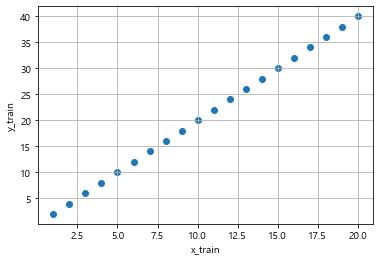

In [17]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

In [18]:
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(1, input_dim=1, activation='linear'))
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [28]:
# x_train(독립변수) -> 규칙 -> y_train(종속변수, 찾아야할 값, target, yhat)
# validation_split=0.2: 검증 데이터 20% 사용
# 훈련 데이터 -> 모델 f(x)=ax + b -> 검증 데이터 -> 테스트 데이터(실전)
# shuffle=True: 데이터를 혼합하여 추출
# epochs=300: 전체 데이터 기준으로 300번 훈련 실시
# batch_size=1: 미니배치, 가중치/편향의 update 기준, 
#               1건의 데이터를 읽은후 오차역전파를 진행하여 미분을통해 
#               모든 가중치와 편향을 변경
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)
# Epoch 1/300
# 16/16: 16건에 대해서 16번 가중치/변향 변경
# loss: 180.5450: 훈련 손실, val_loss: 657.1949: 검증 손실        

Epoch 1/300
16/16 [==============================] - 0s 7ms/step - loss: 7.1800 - val_loss: 40.4535
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 7.0343 - val_loss: 39.4251
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 6.8427 - val_loss: 38.5882
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 6.6967 - val_loss: 37.6443
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 6.5145 - val_loss: 36.9340
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 6.3786 - val_loss: 36.0430
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 6.2243 - val_loss: 35.2199
Epoch 8/300
16/16 [==============================] - 0s 3ms/step - loss: 6.0710 - val_loss: 34.4754
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 5.9306 - val_loss: 33.7595
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 5.8023 - val_loss: 32.9650

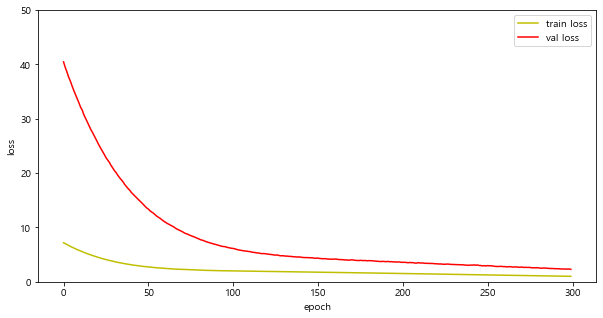

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 50]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper right') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [34]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)  # (5,)

y = x * 2  # 비교 목적
print('찾아야할 값:', y)

p = model.predict(x) # 모델 사용
print(type(p)) # (5, 1): Output Shape: (None, 1)
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[ 94.17943 ]
 [ 95.98491 ]
 [ 97.79039 ]
 [ 99.595856]
 [101.40134 ]]


In [35]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 94.1794281006, 정제된값: 94
x: 52, 실제값: 104, 예측값: 95.9849090576, 정제된값: 96
x: 53, 실제값: 106, 예측값: 97.7903900146, 정제된값: 98
x: 54, 실제값: 108, 예측값: 99.5958557129, 정제된값: 100
x: 55, 실제값: 110, 예측값: 101.4013366699, 정제된값: 101


### 학습이 이루어지고는 있으나 노드가 1개라서 학습 능력이 매우 떨어짐(과소적합).
- 훈련 횟수를 늘린다.
- 네트워크의 규모를 증가시킨다.

In [37]:
model = Sequential() # 컨테이너 객체 생성
# Dense: 전결합층, 1: 뉴런(노드)의 수, input_dim=1: 입력데이터의 가지수
# activation='linear': 활성화 함수 입력 -> 출력
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력값은 이전 Layer의 노드수 10개
# optimizer='adam': 오차역전파 알고리즘, loss='mse': 평균제곱오차
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인, Param: 가중치, 편향, 100만개이상이면 GPU 권장
# Dense: 전결합층 기반의 네트워크
# Output Shape: (None, 1) 출력은 2차원의 형태임, 컬럼이 1개임
# None: 입력값에 따라 출력값의 갯수가 결정된으로 출력값은 가변적임.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 0s 12ms/step - loss: 284.7892 - val_loss: 981.7075
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 251.1916 - val_loss: 879.4777
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 359.4685 - val_loss: 778.6806
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 245.0297 - val_loss: 693.9189
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 192.5414 - val_loss: 618.0674
Epoc

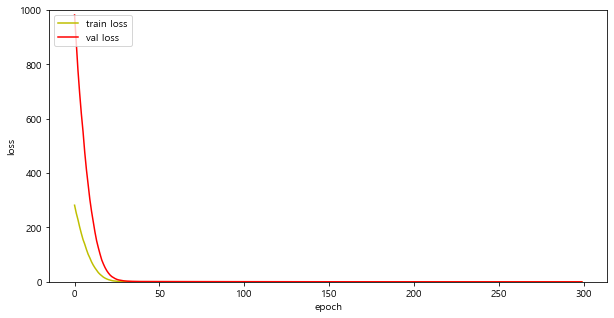

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1000]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [39]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [28]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)  # (5,)

y = x * 2  # 비교 목적
print('찾아야할 값:', y)

p = model.predict(x) # 모델 사용
print(type(p)) # (5, 1): Output Shape: (None, 1)
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[101.95971]
 [103.95868]
 [105.95765]
 [107.95662]
 [109.9556 ]]


In [29]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 101.9597091675, 정제된값: 102
x: 52, 실제값: 104, 예측값: 103.9586791992, 정제된값: 104
x: 53, 실제값: 106, 예측값: 105.9576492310, 정제된값: 106
x: 54, 실제값: 108, 예측값: 107.9566192627, 정제된값: 108
x: 55, 실제값: 110, 예측값: 109.9555969238, 정제된값: 110


In [40]:
# 사용자로부터 수를 입력받아 배수를 알려주는 AI 모델
src = int(input('배수를 구할 수를 입력하세요:'))
x = np.array([src])
y = x * 2 # 실제답, 비교 목적
p = model.predict(x) # 모델 사용, 2차원 배열로 예측 결과 발생
print(p)
fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
print(fmt.format(x[0], y, p[0][0], p[0][0]))

[[99.94995]]
x: 50, 실제값: [100], 예측값: 99.9499511719, 정제된값: 100
